In [16]:
 Pkg.add("CovarianceMatrices")
 Pkg.add("Gadfly")
Pkg.add("Tables")
Pkg.add("Distributions")
Pkg.add("TableOperations")
Pkg.add("StatsBase")
Pkg.add("FreqTables")



 using Distributions
using DataFrames
using CSV
using Tables
using GLM
using CovarianceMatrices

using Gadfly
using Random


   Resolving package versions...
   Installed IOCapture ─────────── v0.2.4
   Installed ANSIColoredPrinters ─ v0.0.1
   Installed StatsBase ─────────── v0.33.21
   Installed Documenter ────────── v0.27.25
   Installed GLM ───────────────── v1.8.3
   Installed StatsModels ───────── v0.6.33
   Installed CovarianceMatrices ── v0.10.4
    Updating `~/.julia/environments/v1.8/Project.toml`
⌅ [60f91f6f] + CovarianceMatrices v0.10.4
⌃ [38e38edf] ↓ GLM v1.9.0 ⇒ v1.8.3
⌅ [2913bbd2] ↓ StatsBase v0.34.3 ⇒ v0.33.21
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [a4c015fc] + ANSIColoredPrinters v0.0.1
⌅ [60f91f6f] + CovarianceMatrices v0.10.4
⌅ [e30172f5] + Documenter v0.27.25
⌃ [38e38edf] ↓ GLM v1.9.0 ⇒ v1.8.3
  [b5f81e59] + IOCapture v0.2.4
⌅ [2913bbd2] ↓ StatsBase v0.34.3 ⇒ v0.33.21
⌅ [3eaba693] ↓ StatsModels v0.7.3 ⇒ v0.6.33
        Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why us

# Proof of Neyman Orthogonality condition

We have the following linear regression:

$$Y = \alpha D + \beta W' + \epsilon$$

Where: $\alpha$ is the target paramter, $\gamma_{DW}'$ is the estimator of lasso regression D on W and $\gamma_{YW}'$ is the estimator of lasso regression Y on W. On the other hand, $\tilde{Y}$ and $\tilde{D}$ are residuals from the estimation:

$$\tilde{Y} = Y-\gamma_{YW}'W$$

$$\tilde{D} = D- \gamma_{DW}'W$$

Then, we get the vector $\eta^{0}$ with true values:
$$\eta^{0} = (\gamma_{DW}',\gamma_{YW}')'$$

In this case, $\alpha$ is a function of $\eta$, so $\alpha=\alpha(\eta)$ and $\eta=(\eta_{1}',\eta_{2}')$

We want to demonstrate that, in first orden, $\alpha$ is insensitive to local perturbations around the true value $\eta^{0}$.

$$D = \dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$$

Let's propose:
$$\tilde{Y} = a \tilde{D} + \mu$$

where $\alpha=\arg\min_{a \in \mathbb R}E(\tilde{Y}-a\tilde{D})^2$. $\alpha$ is the true value of $a$, since $a=\alpha$ solves the equation:

$$E(\tilde{Y}-a\tilde{D})\tilde{D}=0$$

Based on the following condition (equation number 1):

$$M(a,\eta)=E[(\tilde{Y}(\eta_{1})-a\tilde{D}(\eta_{2}))\tilde{D}(\eta_{2})]$$

Where: $\tilde{Y}(\eta_{1})=Y-\eta_{1}'W$ and $\tilde{D}(\eta_{2})=D-\eta_{2}'W$.

Corresponding to the true values $\eta=\eta^{0}$:

$$\tilde{Y}=Y-\gamma_{YW}'W ; \tilde{D}=D-\gamma_{DW}'W$$

By the implicit function theorem:

$$\dfrac {\partial a}{\partial \eta}=-\partial_{a}M(\alpha,\eta^{0})^{-1}\partial_{\eta}M(\alpha,\eta^{0})$$

Remember that we want to demonstrate $\dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$

As we observe, the first component $\partial_{a}M(\alpha,\eta^{0})$ can not be zero, so to get what we want, $\partial_{\eta}M(\alpha,\eta^{0})$ must be zero.

The second componet is:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta}=\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}+\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}$$

Also We will refer to  $\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}$ as $S_{1}$ and   $\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}$ as $S_{2}$

Solving  $S_{1}$ :

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}=E[\dfrac {\partial \tilde{Y}(\eta_{1})}{\partial \eta_{1}}\tilde{D}] $$

As we know: $\tilde{Y} = Y-\eta_{1}'W$

$$\dfrac {\partial \tilde{Y}}{\partial \eta_{1}}=-W $$

Then:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}=E[-W\tilde{D}]=0$$

Now we solve $S_{2}$:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=E[(-a\dfrac {\partial \tilde{D}(\eta_{2})}{\partial \eta_{2}})\tilde{D} + \dfrac {\partial \tilde{D}(\eta_{2})}{\partial \eta_{2}}(\tilde{Y}-a\tilde{D})] $$

As we know: $\tilde{D} = D-\eta_{2}'W$

$$\dfrac {\partial \tilde{D}}{\partial \eta_{2}}=-W $$

Then:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=E[-a(-W)\tilde{D}+(-W)(\tilde{Y}-a\tilde{D})] $$

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=-E(W\tilde{Y})+2E(\alpha W\tilde{D})=0 $$

Thus, we have demonstrated that  $S_{1}=0$ and $S_{2}=0$ are indeed true. Additionally, we have shown that $\dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$.




#2.Orthogonal Learning

In [22]:
Random.seed!(1234)

TaskLocalRNG()

In [12]:

#importamos hdmjl
#include("../Julia_Notebooks/hdmjl/hdmjl.jl")
include("/content/hdmjl.jl")

$$ D=lambda*X + e_1$$
$$Y= 10*D + X*beta + e_2$$

B=100


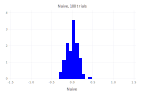

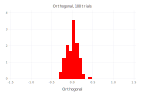

In [34]:
B = 100
Naive = zeros(B)
Orthogonal = zeros(B)

for i in 1:B
    n = 1000
    p = 100
    beta = 1/(1:p).^2
    gamma = 1/(1:p).^2

    X = rand(Normal(0,1),n,p)
    D = X * transpose(gamma) + (rand(Normal(0,1),n,1)/4)
    Y = 10*D + X * transpose(beta) + rand(Normal(0,1),n,1)

    X = DataFrame(X, :auto)
    D = DataFrame(D, ["D"])
    X1 = hcat(D,X)

    Y = DataFrame(Y, ["Y"])

    ## NAIVE
    model1=rlasso_arg( X1, Y ,nothing, true, true, true, false, false,
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, false, Inf, true )

    coef1 = rlasso(model1)["coefficients"][3:102,2]
    SX_IDs = findall(rlasso(model1)["coefficients"][3:102,2] .!= 0 )

    if (sum(coef1[SX_IDs,:])==0)
        Y1 = hcat(Y,D)
        Naive[i] = coef(lm(@formula(Y ~ D), Y1))[2] - 10
    end

    if (sum(coef1[SX_IDs,:])>0)
        Xi = DataFrame(X[:,SX_IDs])
        Y2 = hcat(Y,D,Xi)
        Naive[i] = coef(lm(@formula(Y ~ D + Xi), Y2))[2] - 10
    end

    ## ORTHOGONAL LEARNING
    model2 =rlasso_arg( X, Y ,nothing, false, true, true, false, false,
                        nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )
    model3 =rlasso_arg( X, D ,nothing, false, true, true, false, false,
                        nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

    resY = rlasso(model2)["residuals"]
    resD = rlasso(model3)["residuals"]
    Y3=DataFrame(hcat(resY,resD),["resY","resD"])
    Orthogonal[i]= coef(lm(@formula(resY ~ resD), Y3))[2] - 10

end


results = DataFrame(hcat(Naive,Orthogonal),["Naive","Orthogonal"])

display(Gadfly.plot(results, Coord.cartesian(xmin=-1.5, xmax=1.5),
    layer(x = "Naive", Geom.histogram(bincount=10, density=true),
    color=[colorant"blue"]),
    Guide.title("Naive, 100 trials")
))

display(Gadfly.plot(results, Coord.cartesian(xmin=-1.5, xmax=1.5),
    layer(x = "Orthogonal", Geom.histogram(bincount=10, density=true),
    color=[colorant"red"]),
    Guide.title("Orthogonal, 100 trials")
))

B = 1000

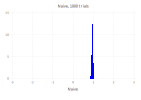

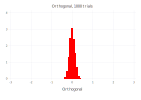

In [40]:
# Parameters
B = 1000
Naive = zeros(B)
Orthogonal = zeros(B)

for i in 1:B
    n = 1000
    p = 100
    beta = 1 ./ (1:p) .^ 2
    gamma = 1 ./ (1:p) .^ 2

    X = rand(Normal(0, 1), n, p)
    D = X * gamma .+ (rand(Normal(0, 1), n, 1) ./ 4)
    Y = 10 .* D .+ X * beta .+ rand(Normal(0, 1), n, 1)

    X_df = DataFrame(X, :auto)
    D_df = DataFrame(D, ["D"])
    Y_df = DataFrame(Y, ["Y"])

    ## NAIVE
    naive_model = lm(@formula(Y ~ D), hcat(Y_df, D_df))
    Naive[i] = coef(naive_model)[2] - 10

    ## ORTHOGONAL LEARNING
    formula_orthogonal_Y = Term(:Y) ~ sum(Term(Symbol(name)) for name in names(X_df))
    formula_orthogonal_D = Term(:D) ~ sum(Term(Symbol(name)) for name in names(X_df))
    model2 = lm(formula_orthogonal_Y, hcat(Y_df, X_df))
    model3 = lm(formula_orthogonal_D, hcat(D_df, X_df))

    resY = residuals(model2)
    resD = residuals(model3)
    Y3 = DataFrame(hcat(resY, resD), ["resY", "resD"])
    Orthogonal[i] = coef(lm(@formula(resY ~ resD), Y3))[2] - 10
end

results = DataFrame(hcat(Naive, Orthogonal), ["Naive", "Orthogonal"])

# Plot Naive Estimators
display(Gadfly.plot(results,Coord.cartesian(xmin = -3, xmax = 3),
    layer(x = :Naive, Geom.histogram(bincount = 10, density = true),
    color = [colorant"blue"]),
    Guide.title("Naive, 1000 trials")
))

# Plot Orthogonal Estimators
display(Gadfly.plot(results, Coord.cartesian(xmin = -3, xmax = 3),
    layer(x = :Orthogonal, Geom.histogram(bincount = 10, density = true),
    color = [colorant"red"]),
    Guide.title("Orthogonal, 1000 trials")
))

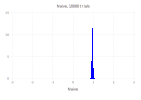

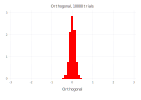

In [41]:
# Parameters
B = 10000
Naive = zeros(B)
Orthogonal = zeros(B)

for i in 1:B
    n = 1000
    p = 100
    beta = 1 ./ (1:p) .^ 2
    gamma = 1 ./ (1:p) .^ 2

    X = rand(Normal(0, 1), n, p)
    D = X * gamma .+ (rand(Normal(0, 1), n, 1) ./ 4)
    Y = 10 .* D .+ X * beta .+ rand(Normal(0, 1), n, 1)

    X_df = DataFrame(X, :auto)
    D_df = DataFrame(D, ["D"])
    Y_df = DataFrame(Y, ["Y"])

    ## NAIVE
    naive_model = lm(@formula(Y ~ D), hcat(Y_df, D_df))
    Naive[i] = coef(naive_model)[2] - 10

    ## ORTHOGONAL LEARNING
    formula_orthogonal_Y = Term(:Y) ~ sum(Term(Symbol(name)) for name in names(X_df))
    formula_orthogonal_D = Term(:D) ~ sum(Term(Symbol(name)) for name in names(X_df))
    model2 = lm(formula_orthogonal_Y, hcat(Y_df, X_df))
    model3 = lm(formula_orthogonal_D, hcat(D_df, X_df))

    resY = residuals(model2)
    resD = residuals(model3)
    Y3 = DataFrame(hcat(resY, resD), ["resY", "resD"])
    Orthogonal[i] = coef(lm(@formula(resY ~ resD), Y3))[2] - 10
end

results = DataFrame(hcat(Naive, Orthogonal), ["Naive", "Orthogonal"])

# Plot Naive Estimators
display(Gadfly.plot(results,Coord.cartesian(xmin = -3, xmax = 3),
    layer(x = :Naive, Geom.histogram(bincount = 10, density = true),
    color = [colorant"blue"]),
    Guide.title("Naive, 10000 trials")
))

# Plot Orthogonal Estimators
display(Gadfly.plot(results, Coord.cartesian(xmin = -3, xmax = 3),
    layer(x = :Orthogonal, Geom.histogram(bincount = 10, density = true),
    color = [colorant"red"]),
    Guide.title("Orthogonal, 10000 trials")
))

The Orthogonal estimator significantly surpasses the Naive estimator in reducing bias. By incorporating adjustments for confounding variables in $X$, the Orthogonal technique ensures more precise and trustworthy estimates of the treatment effect. This analysis underlines the critical role of including confounding variables in causal analysis and illustrates how orthogonal learning methods effectively minimize bias.

Overall, this analysis reiterates the importance of precise model specification and the necessity to account for confounding factors when assessing causal effects. Through careful consideration of these factors, the Orthogonal method provides a reliable method for securing unbiased estimates.

# 3.Double Lasso - Using School data


In [1]:

 import Pkg

 Pkg.add("CodecBzip2")
 Pkg.add("DataStructures")
 Pkg.add("NamedArrays")
 Pkg.add("PrettyTables")
 Pkg.add("Lasso")
 Pkg.add("GLM")
 Pkg.add("CSV")
Pkg.add("DataFrames")



    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Bzip2_jll ────────── v1.0.8+1
   Installed TranscodingStreams ─ v0.10.8
   Installed CodecBzip2 ───────── v0.8.2
    Updating `~/.julia/environments/v1.8/Project.toml`
  [523fee87] + CodecBzip2 v0.8.2
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [523fee87] + CodecBzip2 v0.8.2
  [3bb67fe8] + TranscodingStreams v0.10.8
  [6e34b625] + Bzip2_jll v1.0.8+1
Precompiling project...
  ✓ Bzip2_jll
  ✓ TranscodingStreams
  ✓ CodecBzip2
  3 dependencies successfully precompiled in 2 seconds. 20 already precompiled.
   Resolving package versions...
   Installed Compat ───────────── v4.15.0
   Installed OrderedCollections ─ v1.6.3
   Installed DataStructures ───── v0.18.20
    Updating `~/.julia/environments/v1.8/Project.toml`
  [864edb3b] + DataStructures v0.18.20
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [34da2185] + Compat v4.15.0
  [864edb3b] + DataStructures v0.

In [ ]:
Pkg.add("Distributions")

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [31c24e10] + Distributions v0.25.108
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [ ]:
using Pkg
using LinearAlgebra, GLM, DataFrames, Statistics, Random, Distributions, DataStructures, NamedArrays, PrettyTables
import CodecBzip2

using CSV, DataFrames

In [ ]:
# Load the dataset
data = CSV.read("bruhn2016.csv", DataFrame)

# Replace dots with underscores in column names
rename!(data, Symbol.(replace.(String.(names(data)), "." => "_")))

# Display the first few rows of the dataset
first(data, 5)

Row,outcome.test.score,treatment,school,is.female,mother.attended.secondary.school,father.attened.secondary.school,failed.at.least.one.school.year,family.receives.cash.transfer,has.computer.with.internet.at.home,is.unemployed,has.some.form.of.income,saves.money.for.future.purchases,intention.to.save.index,makes.list.of.expenses.every.month,negotiates.prices.or.payment.methods,financial.autonomy.index
,Float64,Int64,Int64,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3
1,47.3674,0,17018390,NA,NA,NA,NA,NA,NA,1,1,0,29,0,1,52
2,58.1768,1,33002614,NA,NA,NA,NA,NA,NA,0,0,0,41,0,0,27
3,56.6717,1,35002914,1,1,1,0,0,0,1,0,0,48,0,1,56
4,29.0794,0,35908915,1,0,0,0,0,0,0,0,0,42,0,0,27
5,49.5635,1,33047324,1,0,0,0,0,1,0,1,0,50,0,1,31
6,43.0994,0,53012542,1,0,0,0,1,1,0,1,0,93,0,1,77
7,71.3296,0,53006984,1,1,0,0,0,1,1,1,0,52,0,1,43
8,80.0634,0,33049475,1,1,1,0,0,0,0,1,0,50,0,0,31
9,88.7516,1,35925639,1,1,0,0,0,0,0,0,0,59,0,1,50


In [ ]:
y = data[!, "outcome.test.score"]
y = DataFrame([y], [:Y])

Row,Y
,Float64
1,47.3674
2,58.1768
3,56.6717
4,29.0794
5,49.5635
6,43.0994
7,71.3296
8,80.0634
9,88.7516


In [ ]:
X = select(data,
    :"treatment",
    :"is.female",
    :"mother.attended.secondary.school",
    :"father.attened.secondary.school",
    :"has.computer.with.internet.at.home"
)

using DataFrames

# Código original para seleccionar y renombrar columnas
X = select(data,
    :"treatment" => :"X1",
    :"is.female" => :"X2",
    :"mother.attended.secondary.school" => :"X3",
    :"father.attened.secondary.school" => :"X4",
    :"has.computer.with.internet.at.home" => :"X5"
)


Row,X1,X2,X3,X4,X5
,Int64,String3,String3,String3,String3
1,0,NA,NA,NA,NA
2,1,NA,NA,NA,NA
3,1,1,1,1,0
4,0,1,0,0,0
5,1,1,0,0,1
6,0,1,0,0,1
7,0,1,1,0,1
8,0,1,1,1,0
9,1,1,1,0,0


In [ ]:
size(X)

(17299, 5)

In [ ]:

data1 = [y X]


Row,Y,X1,X2,X3,X4,X5
,Float64,Int64,String3,String3,String3,String3
1,47.3674,0,NA,NA,NA,NA
2,58.1768,1,NA,NA,NA,NA
3,56.6717,1,1,1,1,0
4,29.0794,0,1,0,0,0
5,49.5635,1,1,0,0,1
6,43.0994,0,1,0,0,1
7,71.3296,0,1,1,0,1
8,80.0634,0,1,1,1,0
9,88.7516,1,1,1,0,0


### OLS regression

In [ ]:
reg_ols = lm(@formula( Y ~ 	X1 + X2 + X3 + X3 + X4 + X5), data1)

println(coeftable(modelo))

──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  54.1944      0.289615  187.13    <1e-99  53.6268    54.7621
X1            4.29004     0.219127   19.58    <1e-83   3.86053    4.71956
X2: 1         3.59255     0.232516   15.45    <1e-52   3.1368     4.04831
X2: NA        3.75637     1.23789     3.03    0.0024   1.32999    6.18276
X3: 1         1.4438      0.267042    5.41    <1e-07   0.92037    1.96723
X3: NA       -0.833897    0.990629   -0.84    0.3999  -2.77563    1.10784
X4: 1         1.1836      0.271633    4.36    <1e-04   0.651176   1.71603
X4: NA       -1.0358      0.863471   -1.20    0.2303  -2.72829    0.656691
X5: 1        -1.30584     0.243938   -5.35    <1e-07  -1.78399   -0.827698
X5: NA       -2.55894     0.894321   -2.86    0.0042  -4.3119    -0.805981
─────────────────────────────────

In [ ]:
 Pkg.add("StatsModels")

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [3eaba693] + StatsModels v0.7.3
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [ ]:
est_ols = coef(reg_ols)[2]

# output: std. error
std_ols = stderror(reg_ols)[2]

# output: 95% confidence interval
lower_ci = coeftable(reg_ols).cols[5][2]
upper_ci = coeftable(reg_ols).cols[6][2]



4.719555666022803

### Summarize OLS results


In [ ]:
table_1 = NamedArray(zeros(1, 4))
setnames!(table_1, ["OLS"], 1)
table_1

1×4 Named Matrix{Float64}
A ╲ B │   1    2    3    4
──────┼───────────────────
OLS   │ 0.0  0.0  0.0  0.0

In [ ]:
table_1[1] = est_ols
table_1[2] = std_ols
table_1[3] = lower_ci
table_1[4] = upper_ci

table_1

1×4 Named Matrix{Float64}
A ╲ B │        1         2         3         4
──────┼───────────────────────────────────────
OLS   │  4.29004  0.219127   3.86053   4.71956

In [ ]:
table_1_pandas = DataFrame( table_1, [ :"Estimator", :"Std. Error", :"lower bound CI", :"upper bound CI"])
model_1 = DataFrame(model = ["OLS"])
table_1_pandas = hcat(model_1,table_1_pandas)
table_1_pandas

Row,model,Estimator,Std. Error,lower bound CI,upper bound CI
,String,Float64,Float64,Float64,Float64
1,OLS,4.29004,0.219127,3.86053,4.71956


In [ ]:
header = (["Model", "Estimator", "Std. Error", "lower bound CI", "upper bound CI"])
pretty_table(table_1_pandas; backend = Val(:html), header = header, formatters=ft_round(6), alignment=:c)


Model,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,4.29004,0.219127,3.86053,4.71956


### Partialling out (based on Double Lasso)

In [ ]:
Y = data[!, "outcome.test.score"]
Y = DataFrame([Y], [:Y])
D = X[!, "X1"]
D = DataFrame([D], [:D])
W = select(X, Not(["X1"]))
data = [Y D W]

Row,Y,D,X2,X3,X4,X5
,Float64,Int64,String3,String3,String3,String3
1,47.3674,0,NA,NA,NA,NA
2,58.1768,1,NA,NA,NA,NA
3,56.6717,1,1,1,1,0
4,29.0794,0,1,0,0,0
5,49.5635,1,1,0,0,1
6,43.0994,0,1,0,0,1
7,71.3296,0,1,1,0,1
8,80.0634,0,1,1,1,0
9,88.7516,1,1,1,0,0


In [ ]:
using Lasso, GLM

In [ ]:
# Seat values for Lasso

lasso_model = fit(LassoModel, term(:Y) ~  sum(term.(names(data[!, Not(["Y", "D"])]))), data; α = 0.8)
r_Y = residuals(lasso_model)
r_Y = DataFrame([r_Y], [:r_Y])

# Part. out d

lasso_model = fit(LassoModel, term(:D) ~  sum(term.(names(data[!, Not(["Y", "D"])]))), data;  α = 0.8)
r_D = residuals(lasso_model)
r_D = DataFrame([r_D], [:r_D])

# ols
data_aux = [r_Y r_D]
fm_1 = @formula(r_Y ~ r_D)
partial_lasso_fit = lm(fm_1, data_aux)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

r_Y ~ 1 + r_D

Coefficients:
───────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  4.74982e-14    0.109449   0.00    1.0000  -0.214531   0.214531
r_D          4.28849        0.219072  19.58    <1e-83   3.85908    4.71789
───────────────────────────────────────────────────────────────────────────

In [ ]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = coef(partial_lasso_fit)[2]

# output: std. error
std_lasso = stderror(partial_lasso_fit)[2]

# output: 95% confidence interval
lower_ci_lasso = coeftable(partial_lasso_fit).cols[5][2]
upper_ci_lasso = coeftable(partial_lasso_fit).cols[6][2]

4.717890150299997

In [ ]:
# Regress residuales
partial_lasso_fit = lm(fm_1, data_aux)
partial_lasso_est = coef(partial_lasso_fit)[2]

println("Coefficient for D via partialling-out using lasso is: ", partial_lasso_est )

Coefficient for D via partialling-out using lasso is: 4.288487055874471



### Summary LASSO results

In [ ]:
table_2 = NamedArray(zeros(1, 4))
setnames!(table_2, ["DOUBLE LASSO"], 1)
table_2

1×4 Named Matrix{Float64}
       A ╲ B │   1    2    3    4
─────────────┼───────────────────
DOUBLE LASSO │ 0.0  0.0  0.0  0.0

In [ ]:
table_2[1] = est_lasso
table_2[2] = std_lasso
table_2[3] = lower_ci_lasso
table_2[4] = upper_ci_lasso

table_2

1×4 Named Matrix{Float64}
       A ╲ B │        1         2         3         4
─────────────┼───────────────────────────────────────
DOUBLE LASSO │  4.28849  0.219072   3.85908   4.71789

In [ ]:

table_2_pandas = DataFrame( table_2, [ :"Estimator", :"Std. Error", :"lower bound CI", :"upper bound CI"])
model_2 = DataFrame(model = ["DOUBLE LASSO"])
table_2_pandas = hcat(model_2,table_2_pandas)
table_2_pandas

Row,model,Estimator,Std. Error,lower bound CI,upper bound CI
,String,Float64,Float64,Float64,Float64
1,DOUBLE LASSO,4.28849,0.219072,3.85908,4.71789


In [ ]:
header = (["Model", "Estimator", "Std. Error", "lower bound CI", "upper bound CI"])
pretty_table(table_2_pandas; backend = Val(:html), header = header, formatters=ft_round(6), alignment=:c)


Model,Estimator,Std. Error,lower bound CI,upper bound CI
DOUBLE LASSO,4.28849,0.219072,3.85908,4.71789


In [ ]:
table_3 = vcat(table_1, table_2)
setnames!(table_3, ["OLS", "DOUBLE LASSO"], 1)
table_3

2×4 Named Matrix{Float64}
    vcat ╲ B │        1         2         3         4
─────────────┼───────────────────────────────────────
OLS          │  4.29004  0.219127   3.86053   4.71956
DOUBLE LASSO │  4.28849  0.219072   3.85908   4.71789

In [ ]:
table_3_pandas = DataFrame( table_3, [ :"Estimator", :"Std. Error", :"lower bound CI", :"upper bound CI"])
model_3 = DataFrame(model = ["OLS", "DOUBLE LASSO"])
table_3_pandas = hcat(model_3, table_3_pandas)
table_3_pandas

Row,model,Estimator,Std. Error,lower bound CI,upper bound CI
,String,Float64,Float64,Float64,Float64
1,OLS,4.29004,0.219127,3.86053,4.71956
2,DOUBLE LASSO,4.28849,0.219072,3.85908,4.71789


In [ ]:
header = (["Model", "Estimator", "Std. Error", "lower bound CI", "upper bound CI"])
pretty_table(table_3_pandas; backend = Val(:html), header = header, formatters=ft_round(6), alignment=:c)


Model,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,4.29004,0.219127,3.86053,4.71956
DOUBLE LASSO,4.28849,0.219072,3.85908,4.71789


In [ ]:
Pkg.add("Plots")

   Resolving package versions...
   Installed Libmount_jll ───────────────── v2.40.1+0
   Installed JpegTurbo_jll ──────────────── v3.0.3+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed GR_jll ─────────────────────── v0.73.5+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed LoggingExtras ──────────────── v1.0.3
   Installed ConcurrentUtilities ────────── v2.4.1
   Installed Measures ───────────────────── v0.3.2
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed Unitful ────────────────────── v1.19.1
   Installed Contour ────────────────────── v0.6.3
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Grisu ──────────────────────── v1.0.2
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed PlotUtils ──────────────────── v1.4.1
   Installed RecipesPipeli

In [ ]:
using Plots

In [ ]:
Pkg.add("Tables")

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [bd369af6] + Tables v1.11.1
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [ ]:
Pkg.add("TableOperations")

   Resolving package versions...
   Installed TableOperations ─ v1.2.0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [ab02a1b2] + TableOperations v1.2.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [ab02a1b2] + TableOperations v1.2.0
Precompiling project...
  ✓ TableOperations
  1 dependency successfully precompiled in 1 seconds. 207 already precompiled.


In [ ]:
Pkg.add("StatsBase")

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [2913bbd2] + StatsBase v0.34.3
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [ ]:
Pkg.add("FreqTables")


   Resolving package versions...
   Installed FreqTables ──────── v0.4.6
   Installed CategoricalArrays ─ v0.10.8
    Updating `~/.julia/environments/v1.8/Project.toml`
  [da1fdf0e] + FreqTables v0.4.6
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [324d7699] + CategoricalArrays v0.10.8
  [da1fdf0e] + FreqTables v0.4.6
Precompiling project...
  ✓ CategoricalArrays
  ✓ FreqTables
  2 dependencies successfully precompiled in 3 seconds. 208 already precompiled.


In [ ]:
include("/hdmjl.jl")

In [ ]:
res_Y_0 = rlasso_arg( W, Y, nothing, true, true, true, false, false,
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )



rlasso_arg(17299×4 DataFrame
   Row │ X2       X3       X4       X5      
       │ String3  String3  String3  String3 
───────┼────────────────────────────────────
     1 │ NA       NA       NA       NA
     2 │ NA       NA       NA       NA
     3 │ 1        1        1        0
     4 │ 1        0        0        0
     5 │ 1        0        0        1
     6 │ 1        0        0        1
     7 │ 1        1        0        1
     8 │ 1        1        1        0
     9 │ 1        1        0        0
    10 │ 1        0        0        1
    11 │ 1        0        0        1
   ⋮   │    ⋮        ⋮        ⋮        ⋮
 17290 │ 1        1        0        0
 17291 │ 1        0        0        0
 17292 │ 1        0        0        1
 17293 │ NA       NA       NA       NA
 17294 │ 1        1        1        0
 17295 │ 1        1        1        0
 17296 │ 1        0        0        1
 17297 │ 1        0        0        1
 17298 │ 1        1        1        0
 17299 │ NA       NA       NA   

In [ ]:
res_Y = rlasso(res_Y_0)

LoadError: MethodError: no method matching /(::String3, ::Int64)
[0mClosest candidates are:
[0m  /([91m::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}[39m, ::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:97
[0m  /([91m::StridedArray{P}[39m, ::Real) where P<:Dates.Period at /usr/local/share/julia/stdlib/v1.8/Dates/src/deprecated.jl:44
[0m  /([91m::Union{SparseArrays.SparseVector{Tv, Ti}, SubArray{Tv, 1, <:SparseArrays.AbstractSparseMatrixCSC{Tv, Ti}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, false}, SubArray{Tv, 1, <:SparseArrays.AbstractSparseVector{Tv, Ti}, Tuple{Base.Slice{Base.OneTo{Int64}}}, false}} where {Tv, Ti}[39m, ::Number) at /usr/local/share/julia/stdlib/v1.8/SparseArrays/src/sparsevector.jl:1506
[0m  ...

In [ ]:
res_D_0 = rlasso_arg( W, D, nothing, true, true, true, false, false,
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )
res_D = rlasso(res_D_0)["residuals"]
# We need to convert the vector into matrix because the lm function requires "X" to be matrix
res_D = reshape(res_D, length(res_D), 1)

LoadError: MethodError: no method matching /(::String3, ::Int64)
[0mClosest candidates are:
[0m  /([91m::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}[39m, ::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:97
[0m  /([91m::StridedArray{P}[39m, ::Real) where P<:Dates.Period at /usr/local/share/julia/stdlib/v1.8/Dates/src/deprecated.jl:44
[0m  /([91m::Union{SparseArrays.SparseVector{Tv, Ti}, SubArray{Tv, 1, <:SparseArrays.AbstractSparseMatrixCSC{Tv, Ti}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, false}, SubArray{Tv, 1, <:SparseArrays.AbstractSparseVector{Tv, Ti}, Tuple{Base.Slice{Base.OneTo{Int64}}}, false}} where {Tv, Ti}[39m, ::Number) at /usr/local/share/julia/stdlib/v1.8/SparseArrays/src/sparsevector.jl:1506
[0m  ...

In [ ]:
reg3 = lm(res_D, res_Y)

LoadError: UndefVarError: res_D not defined

#Double lasso using cross validation

In [42]:
# Load the dataset
data = CSV.read("/content/bruhn2016.csv", DataFrame)

# Replace dots with underscores in column names
rename!(data, Symbol.(replace.(String.(names(data)), "." => "_")))

# Display the first few rows of the dataset
first(data, 5)

Row,outcome_test_score,treatment,school,is_female,mother_attended_secondary_school,father_attened_secondary_school,failed_at_least_one_school_year,family_receives_cash_transfer,has_computer_with_internet_at_home,is_unemployed,has_some_form_of_income,saves_money_for_future_purchases,intention_to_save_index,makes_list_of_expenses_every_month,negotiates_prices_or_payment_methods,financial_autonomy_index
,Float64,Int64,Int64,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3
1,47.3674,0,17018390,NA,NA,NA,NA,NA,NA,1,1,0,29,0,1,52
2,58.1768,1,33002614,NA,NA,NA,NA,NA,NA,0,0,0,41,0,0,27
3,56.6717,1,35002914,1,1,1,0,0,0,1,0,0,48,0,1,56
4,29.0794,0,35908915,1,0,0,0,0,0,0,0,0,42,0,0,27
5,49.5635,1,33047324,1,0,0,0,0,1,0,1,0,50,0,1,31


In [43]:
using Lasso

# Define the dependent and independent variables
X = select(data, Not(:outcome_test_score))
y = data[!, :outcome_test_score]

# Identify numeric columns
numeric_cols = names(data, eltype(Float64))
X_numeric = select(data, numeric_cols)

# Standardize the features
X_scaled = (Matrix(X_numeric) .- mean(Matrix(X_numeric), dims=1)) ./ std(Matrix(X_numeric), dims=1)

[ Info: Precompiling Lasso [b4fcebef-c861-5a0f-a7e2-ba9dc32b180a]
┌ Warning: Module StatsBase with build ID 263409778230 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325
[ Info: Skipping precompilation since __precompile__(false). Importing Lasso [b4fcebef-c861-5a0f-a7e2-ba9dc32b180a].
[ Info: Precompiling MLBase [f0e99cf1-93fa-52ec-9ecc-5026115318e0]
┌ Warning: Module StatsBase with build ID 263409778230 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325
[ Info: Skipping precompilation since __precompile__(false). Importing MLBase [f0e99cf1-93fa-52ec-9ecc-5026115318e0].


17299×1 Matrix{Float64}:
 -0.7497484462258511
 -0.016195437191192163
 -0.1183352151146743
 -1.990819802613348
 -0.600711331857333
 -1.0393820449338986
  0.8763906392041315
  1.4690919128270703
  2.0586954842900136
  0.2049946316256588
  0.366185165959533
  0.5156230193338748
 -1.2780974556216926
  ⋮
 -1.5846664193309963
  0.5992656374097575
 -0.4131618528775077
  1.2455225208819798
  0.3075315243003847
  0.5937422734380289
  0.1280835486714921
 -0.6057133209209731
 -0.1328814197252667
  0.0872180073399465
 -0.06106293219910762
 -2.1054431959814734

In [45]:
# Perform cross-validation to find the best lambda
n_folds = 5
n = size(X_scaled, 1)
folds = rand(1:n_folds, n)

best_lambda = 0.0
best_cv_score = Inf

for lambda in 0.1:0.1:10.0
    cv_scores = []
    for fold in 1:n_folds
        train_idx = findall(folds .!= fold)
        test_idx = findall(folds .== fold)

        lasso_model = fit(LassoPath, X_scaled[train_idx, :], y[train_idx], λ=[lambda])

        predictions = predict(lasso_model, X_scaled[test_idx, :])
        cv_score = mean((y[test_idx] .- predictions).^2)
        push!(cv_scores, cv_score)
    end

    mean_cv_score = mean(cv_scores)
    if mean_cv_score < best_cv_score
        best_cv_score = mean_cv_score
        best_lambda = lambda
    end
end

println("Best Lambda: ", best_lambda)

Best Lambda: 0.1


In [46]:
# Fit the LASSO model with the best lambda
lasso_model = fit(LassoPath, X_scaled, y, λ=[best_lambda])

# Get the main coefficient
lasso_coef = coef(lasso_model)[2]  # Treatment coefficient (assuming treatment is the second predictor)

# Make predictions to calculate residuals
predictions = predict(lasso_model, X_scaled)

# Calculate residuals
lasso_residuals = y .- predictions
std_lasso = std(lasso_residuals) / sqrt(length(y))

# Get the 95% confidence interval
lasso_conf = quantile(lasso_residuals, [0.025, 0.975])

LoadError: MethodError: no method matching GLM.LmResp{SentinelArrays.ChainedVector{Float64, Vector{Float64}}}(::SentinelArrays.ChainedVector{Float64, Vector{Float64}}, ::Vector{Float64}, ::Vector{Float64}, ::SentinelArrays.ChainedVector{Float64, Vector{Float64}})
[0mClosest candidates are:
[0m  GLM.LmResp{V}(::V, [91m::V[39m, [91m::V[39m, ::V) where V at ~/.julia/packages/GLM/vM20T/src/lm.jl:20

In [47]:
# Save the results
lasso_results = (coef = lasso_coef, std_error = std_lasso, lower_ci = lasso_conf[1], upper_ci = lasso_conf[2])

println("LASSO Coefficient: ", lasso_coef)
println("LASSO Standard Error: ", std_lasso)
println("LASSO Confidence Interval: ", lasso_conf)

LoadError: UndefVarError: lasso_conf not defined

# Double Lasso using theoretical Lambda

In [44]:
# Using the HDMjl package for Double LASSO with theoretical lambda
dml = rlassoEffect(X_scaled, y, X_scaled[:, 1], method="double selection")

LoadError: ArgumentError: Package HDMjl not found in current path.
- Run `import Pkg; Pkg.add("HDMjl")` to install the HDMjl package.

In [ ]:
# Access the dictionary of results
dml_res = dml.res

# Print the keys of the dictionary to understand the structure
println(keys(dml_res))

In [ ]:
# Extract the main coefficient and its standard error
# Accessing the dictionary directly
dml_coef = dml["alpha"]
dml_std = dml["se"]

# Calculate the 95% confidence interval
z = 1.96  # 95% confidence level
dml_conf = (dml_coef - z * dml_std, dml_coef + z * dml_std)

# Save the results
dml_results = (coef = dml_coef, std_error = dml_std, lower_ci = dml_conf[1], upper_ci = dml_conf[2])

println("Double LASSO Theoretical Lambda Coefficient: ", dml_coef)
println("Double LASSO Theoretical Lambda Standard Error: ", dml_std)
println("Double LASSO Theoretical Lambda Confidence Interval: ", dml_conf)